# QC and filtering

# A: loading packages

In [1]:
import os
from os import path
import scanpy as sc
from scipy import sparse
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# B: set up

In [2]:
#####################DEFINING TEST NUMBER##############################
test="Test1"

##########################DEFINING IMPUTS##############################
path_imput="/mnt/agnerds/loosolab_SC_RNA_framework/raw_data" #This is the directory where the preprocessed data is located

#################DEFINING THE STAGE OF ANALYSIS#######################
is_it_the_final_run="No" #Set to Yes if this is the final running before send to colaborators

########DEFINING THE EXPERIMENTAL CONDITION TO BE EVALUATED###########
data_to_evaluate='condition' #Define the anndata.obs choose for analysis

####################DATA CORRECTIONS########################
#Perform a initial gene filter? It is important if your anndata object is to huge.
initial_gene_filter="No"

#Filter dataset based on the Minimum number of genes expressed required for a cell to pass filtering?
#Types Yes or No, followed by the minimum QUANTILE for filter. E.g. "Yes:0.2"
filt_min_gen="Yes:0.2"

#Filter dataset excluding cells with some mitochondrial content?
#Types Yes or No, followed by the minimum PERCENTAGE for filter (type from 0 to 1). E.g. "Yes:0.03"
filt_mito_content="Yes:0.035"

#Filtering genes concerning expression in a certain number of cells
#Types Yes or No, followed by the minimum PERCENTAGE for filter (type from 0 to 1). E.g. "Yes:0.001". 0.01 means 1%
filt_min_cells="Yes:0.01"

#Predict doublets (when different cells are mistakenly considered as a single cell)?
test_doublets="Yes"

###################DEFINING COLLORS AND FIGURE PATH####################
color_list=['green', 'red', 'blue', 'pink', 'chartreuse', 'gray', 'yellow', 'brown', 'purple', 'orange', 'wheat', 'lightseagreen', 'cyan', 'khaki', 'cornflowerblue', 'olive', 'gainsboro', 'darkmagenta', 'slategray', 'ivory', 'darkorchid', 'papayawhip', 'paleturquoise', 'oldlace', 'orangered', 'lavenderblush', 'gold', 'seagreen', 'deepskyblue', 'lavender', 'peru', 'silver', 'midnightblue', 'antiquewhite', 'blanchedalmond', 'firebrick', 'greenyellow', 'thistle', 'powderblue', 'darkseagreen', 'darkolivegreen', 'moccasin', 'olivedrab', 'mediumseagreen', 'lightgray', 'darkgreen', 'tan', 'yellowgreen', 'peachpuff', 'cornsilk', 'darkblue', 'violet', 'cadetblue', 'palegoldenrod', 'darkturquoise', 'sienna', 'mediumorchid', 'springgreen', 'darkgoldenrod', 'magenta', 'steelblue', 'navy', 'lightgoldenrodyellow', 'saddlebrown', 'aliceblue', 'beige', 'hotpink', 'aquamarine', 'tomato', 'darksalmon', 'navajowhite', 'lawngreen', 'lightsteelblue', 'crimson', 'mediumturquoise', 'mistyrose', 'lightcoral', 'mediumaquamarine', 'mediumblue', 'darkred', 'lightskyblue', 'mediumspringgreen', 'darkviolet', 'royalblue', 'seashell', 'azure', 'lightgreen', 'fuchsia', 'floralwhite', 'mintcream', 'lightcyan', 'bisque', 'deeppink', 'limegreen', 'lightblue', 'darkkhaki', 'maroon', 'aqua', 'lightyellow', 'plum', 'indianred', 'linen', 'honeydew', 'burlywood', 'goldenrod', 'mediumslateblue', 'lime', 'lightslategray', 'forestgreen', 'dimgray', 'lemonchiffon', 'darkgray', 'dodgerblue', 'darkcyan', 'orchid', 'blueviolet', 'mediumpurple', 'darkslategray', 'turquoise', 'salmon', 'lightsalmon', 'coral', 'lightpink', 'slateblue', 'darkslateblue', 'white', 'sandybrown', 'chocolate', 'teal', 'mediumvioletred', 'skyblue', 'snow', 'palegreen', 'ghostwhite', 'indigo', 'rosybrown', 'palevioletred', 'darkorange', 'whitesmoke']

# C: checking files and directories and loading the anndata

In [3]:
#Checking files and directories and loading
def error_message(DIRE):
    print("The " + DIRE + "\nis wrong or not found.\n")

################################
path_imput=path_imput + "/results/" + test
if path.exists(path_imput): #Check if the main directory exist
    sc.settings.figdir=path_imput #Scanpy figures output
    path_results=path_imput #Figures and table outputs
    if "information.txt" in os.listdir(path_imput):#Check and reading the information.txt
        for a in open(path_imput + "/information.txt"):
            if "Test:" in a:
                test_number=a.split(":")[1].strip()
            elif "Output_1:" in a:
                input_name=a.split(":")[1].strip()
        if test_number != test:#Checking the test number
            print("The test variable must be " + test_number)
        else:
            if input_name not in os.listdir(path_imput):#Checking if the input anndata exist in the directory
                error_message(path_imput + "/" + input_name)
            else:
                print("Loading the anndata and storing as an adata variable.")
                adata = sc.read_h5ad(filename=path_imput + "/" + input_name)#Loading adata file and printing num cells and num genes
                display(adata)
                if adata.obs.columns.astype(str).to_list()[0] != data_to_evaluate:#Checking the experimental condition
                    print("Define the data_to_evaluate variable with one of below words:")
                    print(adata.obs.columns.astype(str).to_list())
    else:
        error_message(path_imput)
else:
    error_message(path_imput)

Loading the anndata and storing as an adata variable.


AnnData object with n_obs × n_vars = 40377 × 55359
    obs: 'condition'
    var: 'gene_ids', 'feature_types'
    layers: 'ambiguous', 'spliced', 'unspliced'

## D: quality control

Initial filtering was not choose.
Plotting highest expressed genes


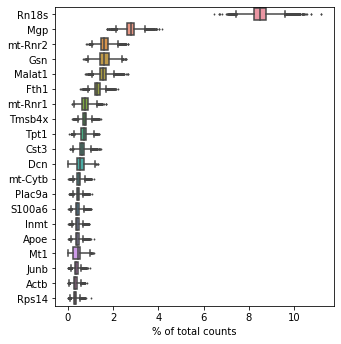

In [4]:
#Initial gene filtering and ploting highest expressed genes
def plotting():
    global adata
    print("Plotting highest expressed genes")
    sc.pl.highest_expr_genes(adata, n_top=20, show=False)

if initial_gene_filter=="Yes":
    min_genes_set=1 #Minimum number of genes expressed required for a cell to pass filtering.
    sc.pp.filter_cells(adata, min_genes = min_genes_set)
    plotting()
else:
    print("Initial filtering was not choose.")
    plotting()

**D1: creating object for mitochondrial genes and cell cycle genes**

In [5]:
is_mito = adata.var_names.str.startswith('mt')
adata.var['is_mito'] = is_mito

**D2: calculating qc metrics. Here, genes counts, num mitochondrial genes, and num cells will be calculated**

In [6]:
qc_metrics = sc.pp.calculate_qc_metrics(adata = adata, qc_vars = ['is_mito'], inplace = False)
adata.obs['n_genes_by_counts'] = qc_metrics[0]['n_genes_by_counts']
adata.obs['log1p_total_counts'] = qc_metrics[0]['log1p_total_counts']
adata.obs['pct_counts_is_mito'] = qc_metrics[0]['pct_counts_is_mito']
adata.var['n_cells_by_counts'] = qc_metrics[1]['n_cells_by_counts']
adata.var['log1p_mean_counts'] = qc_metrics[1]['log1p_mean_counts']
adata.var['mean_counts'] = qc_metrics[1]['mean_counts']
adata.obs['n_counts'] = sparse.csr_matrix(adata.X).sum(axis=1).A1 ####THIS SPARSE CONVERTION IS IMPORTANT TO MAKE THIS ADATA.X USEFUL

# E: cell filtering

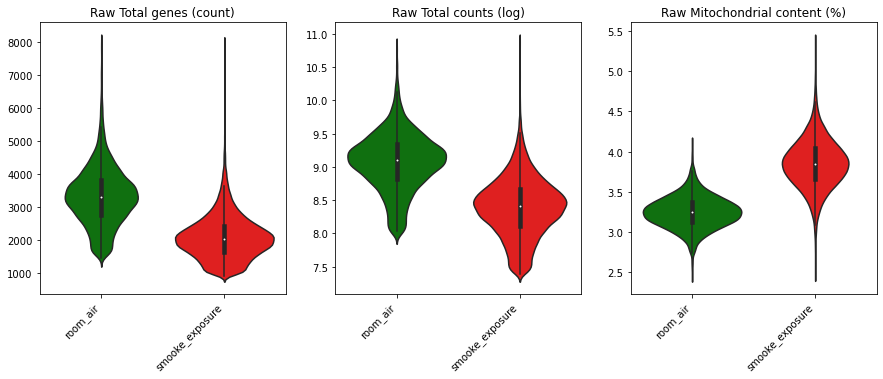

In [7]:
#Violing plot to base the next filtering processess
num_colors=len(adata.obs[data_to_evaluate].cat.categories)
n_rows=1
n_cols=3
if int(num_colors) <= int(len(color_list)):
    color_list=color_list[:num_colors]
    adata.uns[data_to_evaluate + '_colors']=color_list
    columns = ['n_genes_by_counts', 'log1p_total_counts', 'pct_counts_is_mito']
    header = ['Total genes (count)', 'Total counts (log)', 'Mitochondrial content (%)']
    #Setting figures
    fig, axarr = plt.subplots(n_rows, n_cols, figsize = (n_cols*5, n_rows*5))
    axarr = np.array(axarr).reshape((-1, 1)) if n_cols == 1 else axarr
    axarr = np.array(axarr).reshape((1, -1)) if n_rows == 1 else axarr
    axes_list = [b for a in axarr for b in a]
    #Plotting
    for b in range(n_cols):
        ax=axes_list.pop(0)
        sns.violinplot(x=data_to_evaluate, y=columns[b], data=adata.obs, ax=ax, palette=adata.uns[data_to_evaluate + "_colors"])
        ax.set_title("Raw " + header[b])
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
else:
    print("Increase the color_list variable in the beginning of notebook")

In [8]:
#Making copy for filtering
adata2=adata.copy()

In [9]:
#Filtering steps
conditions=adata.obs[data_to_evaluate].unique().tolist()
raw_total_genes_content=[]

#Stablishing the filterings cutoff and filtering
def filtering_steps(QUANTILE, COND, IDX):
    global data_to_evaluate
    global conditions
    value_append=np.quantile(adata.obs[adata.obs[data_to_evaluate]==conditions[conditions.index(IDX)]][COND], QUANTILE)
    return value_append

print(str(adata2.shape) + " Shape before filtering")

#Filtering cells by min genes
if filt_min_gen.split(":")[0] == "Yes":
    for a in conditions:
        raw_total_genes_content.append(filtering_steps(float(filt_min_gen.split(":")[1]), "n_genes_by_counts", a))
    sc.pp.filter_cells(adata2, min_genes=min(raw_total_genes_content)) #Minimum number of genes expressed required for a cell to pass filtering.
    print(str(adata2.shape) + " Shape after filter by minimun number of expressed genes.")
    print("\tExcluded cells with less than " + str(int(min(raw_total_genes_content))) + " genes expressed.")
else:
    message_filt("It was not choose to filter by the minimum number of genes per cell.")

#Filtering cells by mitochondrial content
if filt_mito_content.split(":")[0] == "Yes":
    adata2 = adata2[adata2.obs['pct_counts_is_mito'] < float(filt_mito_content.split(":")[1])*100]
    print(str(adata2.shape) + " Shape after filter mitochondrial content")
    print("\tExcluded cells with more than " + str(float(filt_mito_content.split(":")[1])*100) + " mitochondrial counts.")
else:
    message_filt("It was not choose to filter by the mitochondrial content.")

#Filtering genes concerning expression in a certain number of cells
if filt_min_cells.split(":")[0] == "Yes":
    X_cells=round((float(adata2.shape[0])*(float(filt_min_cells.split(":")[1])*100))/100) #Min num cells of a given gene needs to be present to pass the filter
    sc.pp.filter_genes(adata2, min_cells = X_cells)
    print("\tExcluded genes expressed in less than " + str(X_cells) + " cells.")
    print(str(adata2.shape) + " Final shape")

(40377, 55359) Shape before filtering
(35123, 55359) Shape after filter by minimun number of expressed genes.
	Excluded cells with less than 1532 genes expressed.
(14914, 55359) Shape after filter mitochondrial content
	Excluded cells with more than 3.5000000000000004 mitochondrial counts.


Trying to set attribute `.var` of view, copying.


	Excluded genes expressed in less than 149 cells.
(14914, 14027) Final shape


Saving the anndata.


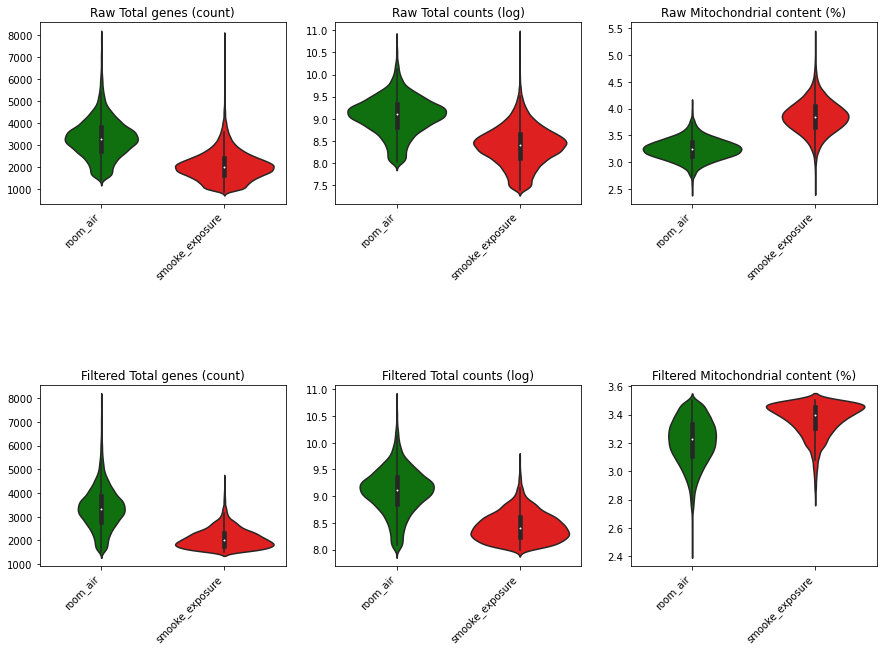

In [10]:
#Final violing plot
#Violing plot to base the next filtering processess
filename="genes_counting_Genotype.png" #EDITE FILE NAME AS NECESSARY
plot_spaces=1 #The space among plots
#######################################################################

path=path_results + "/" + filename
n_rows=2
n_cols=3
def axis_formating():
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
        return

num_colors=len(adata.obs[data_to_evaluate].cat.categories)
if int(num_colors) <= int(len(color_list)):
    color_list=color_list[:num_colors]
    adata2.uns[data_to_evaluate + '_colors']=color_list
    columns = ['n_genes_by_counts', 'log1p_total_counts', 'pct_counts_is_mito']
    header = ['Total genes (count)', 'Total counts (log)', 'Mitochondrial content (%)']
    fig, axs = plt.subplots(n_rows,n_cols,figsize=(n_cols*5, n_rows*5))
    for a in range(1, n_cols+1):
        ax=axs[0, a-1]
        sns.violinplot(x=data_to_evaluate, y=columns[a-1], data=adata.obs, ax=ax, palette=adata.uns[data_to_evaluate + "_colors"])
        ax.set_title("Raw " + header[a-1])
        axis_formating()
    for a in range(1, n_cols+1):
        ax=axs[1, a-1]
        sns.violinplot(x=data_to_evaluate, y=columns[a-1], data=adata2.obs, ax=ax, palette=adata2.uns[data_to_evaluate + "_colors"])
        ax.set_title("Filtered " + header[a-1])
        axis_formating()
    plt.subplots_adjust(hspace=plot_spaces)
else:
    print("Increase the color_list variable in the beginning of notebook")

plt.savefig(path)

#Generating the final adata
adata=adata2.copy()
adata.shape

#Saving the anndata
print("Saving the anndata.")
adata_output= path_results + "/anndata_2_" + test +".h5ad"
adata.write(filename=adata_output)

# F: Saving information

In [11]:
display(adata)
displayoutput=str(adata)
information="\n2_QC_filtering\n" + "\nOutput_2:anndata_2_" + test + ".h5ad" + "\nAnndata:\n" + displayoutput
print(information, file=open(path_results + "/information.txt", "a"))

AnnData object with n_obs × n_vars = 14914 × 14027
    obs: 'condition', 'n_genes_by_counts', 'log1p_total_counts', 'pct_counts_is_mito', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'is_mito', 'n_cells_by_counts', 'log1p_mean_counts', 'mean_counts', 'n_cells'
    uns: 'condition_colors'
    layers: 'ambiguous', 'spliced', 'unspliced'